In [61]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression


In [62]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Handling Missing Values
Since the Penguins dataset might have missing values, we'll handle them similarly.

In [63]:
df.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [64]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include=['object', 'category']).columns

# Create the imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputers
df[num_columns] = num_imputer.fit_transform(df[num_columns])
df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])

# Dropping the 'species' and 'sex' columns for simplicity
df_numeric = df.drop(['species', 'sex', 'island'], axis=1)

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
df_imputed = imputer.fit_transform(df_numeric)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_numeric.columns)

# Check the imputed data
df_imputed.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


Or you can just remove rows with NAs

In [87]:
df = sns.load_dataset('penguins')
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Encoding Categorical Data

In [65]:
encoder = OneHotEncoder(sparse=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_columns]))
df_encoded.columns = encoder.get_feature_names_out(cat_columns)

# Drop original categorical columns and concat encoded ones
df_ohe = df.drop(cat_columns, axis=1)
df_ohe = pd.concat([df, df_encoded], axis=1)

df

/Users/rwollman/miniconda3/envs/physci200/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,Male
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


###  Feature Scaling

In [97]:
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

### Splitting the Dataset into Training and Test Sets

In [98]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df.loc[:,num_columns]
y = df['species']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
340,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
341,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
342,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


### Scikit-learn API

The fit, predict, and transform methods are central to Scikit-learn's API design, providing a consistent interface for a wide range of machine learning algorithms. Here's how these methods are generally used:

- fit: This method is used for training the model on the data. It "fits" the model to the data, learning from the features and corresponding labels.

- predict: After a model has been fitted, the predict method is used to make predictions on new data. This method requires a model that has been trained.

- transform: This method is used on data preprocessing steps (like scaling or encoding) to apply the learned parameters on the data to transform it accordingly. For models, this method isn't always applicable.



/Users/rwollman/miniconda3/envs/physci200/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rwollman/miniconda3/envs/physci200/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rwollman/miniconda3/envs/physci200/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rwollman/miniconda3/envs/physci200/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

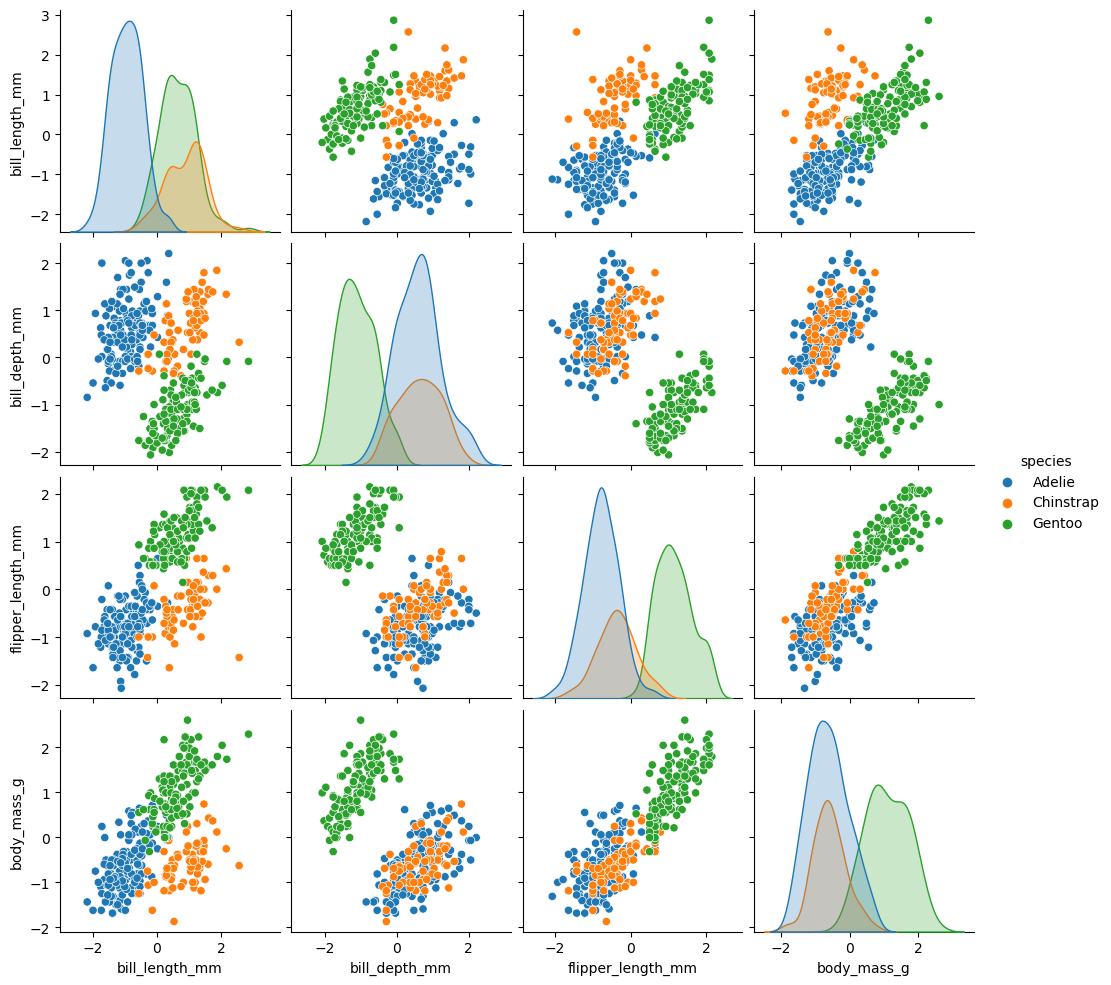

In [101]:
sns.pairplot(df, hue='species')
plt.show()

Accuracy: 0.99


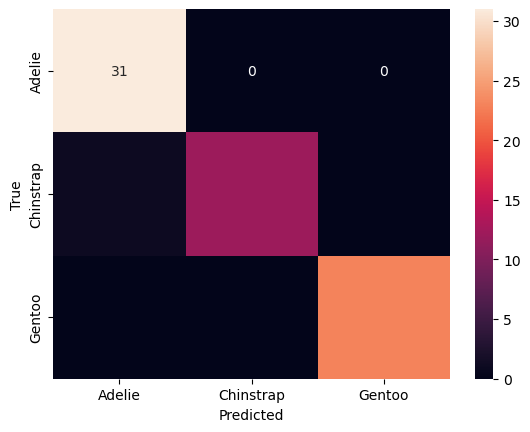

In [102]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions, labels=np.unique(y))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 1.00


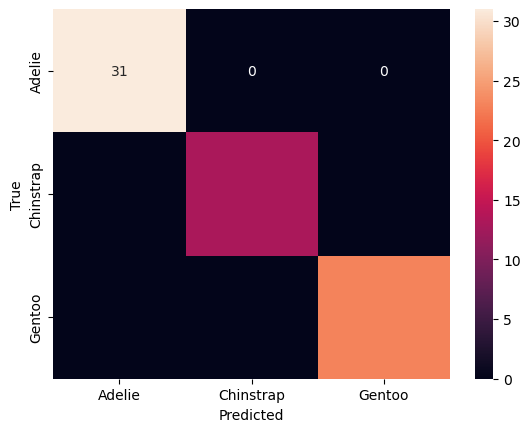

In [103]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions, labels=np.unique(y))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


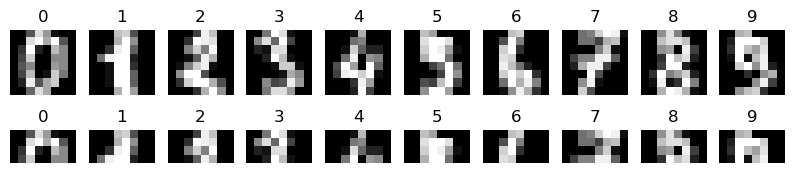

In [133]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target
Xhalf = X[:,:32]
X_train, X_test, y_train, y_test = train_test_split(Xhalf, y, test_size=0.2, random_state=42)

# Set up the figure
fig, axes = plt.subplots(2, 10, figsize=(10, 2))

# Find and plot one example for each digit
for digit in range(10):
    # Find the first occurrence of this digit in the dataset
    index = y.tolist().index(digit)
    image = X[index].reshape(8, 8)  # Reshape the flattened array back into an 8x8 image
    
    # Plot
    axes[0,digit].imshow(image, cmap='gray')
    axes[0,digit].axis('off')
    axes[0,digit].set_title(str(digit))

    image = Xhalf[index].reshape(4, 8)  # Reshape the flattened array back into an 8x8 image
    
    # Plot
    axes[1,digit].imshow(image, cmap='gray')
    axes[1,digit].axis('off')
    axes[1,digit].set_title(str(digit))
    axes[1,digit].set_aspect('equal')

plt.show()

Accuracy: 0.60


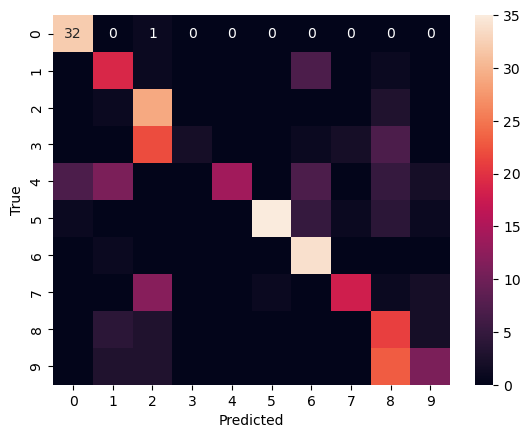

In [134]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions, labels=np.unique(y))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.87


/Users/rwollman/miniconda3/envs/physci200/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


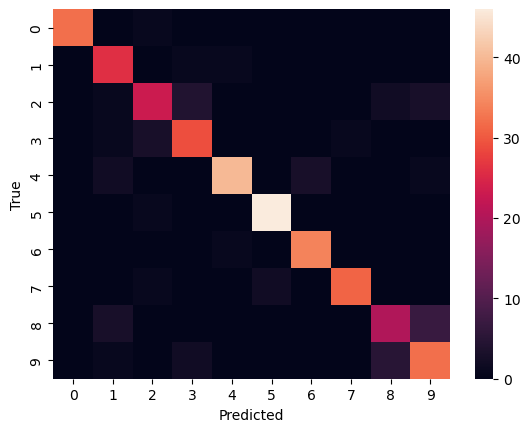

In [135]:
# Initialize the Gaussian Naive Bayes model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions, labels=np.unique(y))
sns.heatmap(conf_mat, annot=False, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

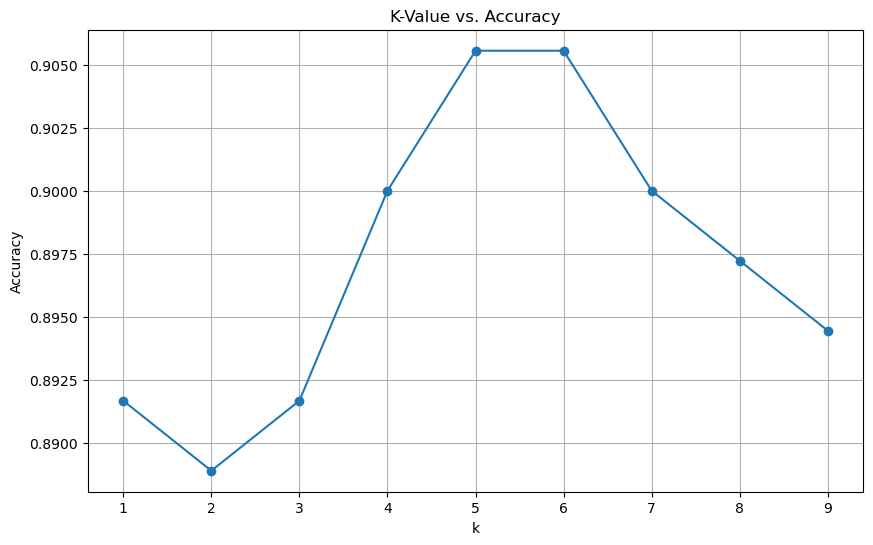

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Range of k to try
k_values = range(1, 10)
accuracies = []

# Train a KNN model using different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plotting k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Value vs. Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

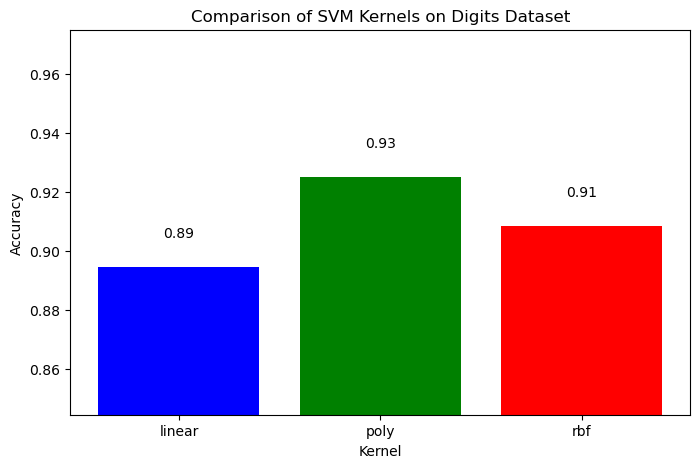

In [137]:
from sklearn.svm import SVC

# Define the kernels to be tested
kernels = ['linear', 'poly', 'rbf']
accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel, gamma='scale')
    svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernels on Digits Dataset')
plt.ylim([min(accuracies) - 0.05, max(accuracies) + 0.05])
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha = 'center')
plt.show()

In [143]:
# Load the dataset
titanic = sns.load_dataset('titanic')

# Drop columns that might not be immediately useful or have too many missing values
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'alone', 'who', 'adult_male', 'fare', 'embarked'], axis=1)

# Fill missing 'age' values with the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Simplify the dataset for this example
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch']]

# Convert 'sex' into a binary variable (male: 0, female: 1)
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

In [144]:
# Define features and target
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


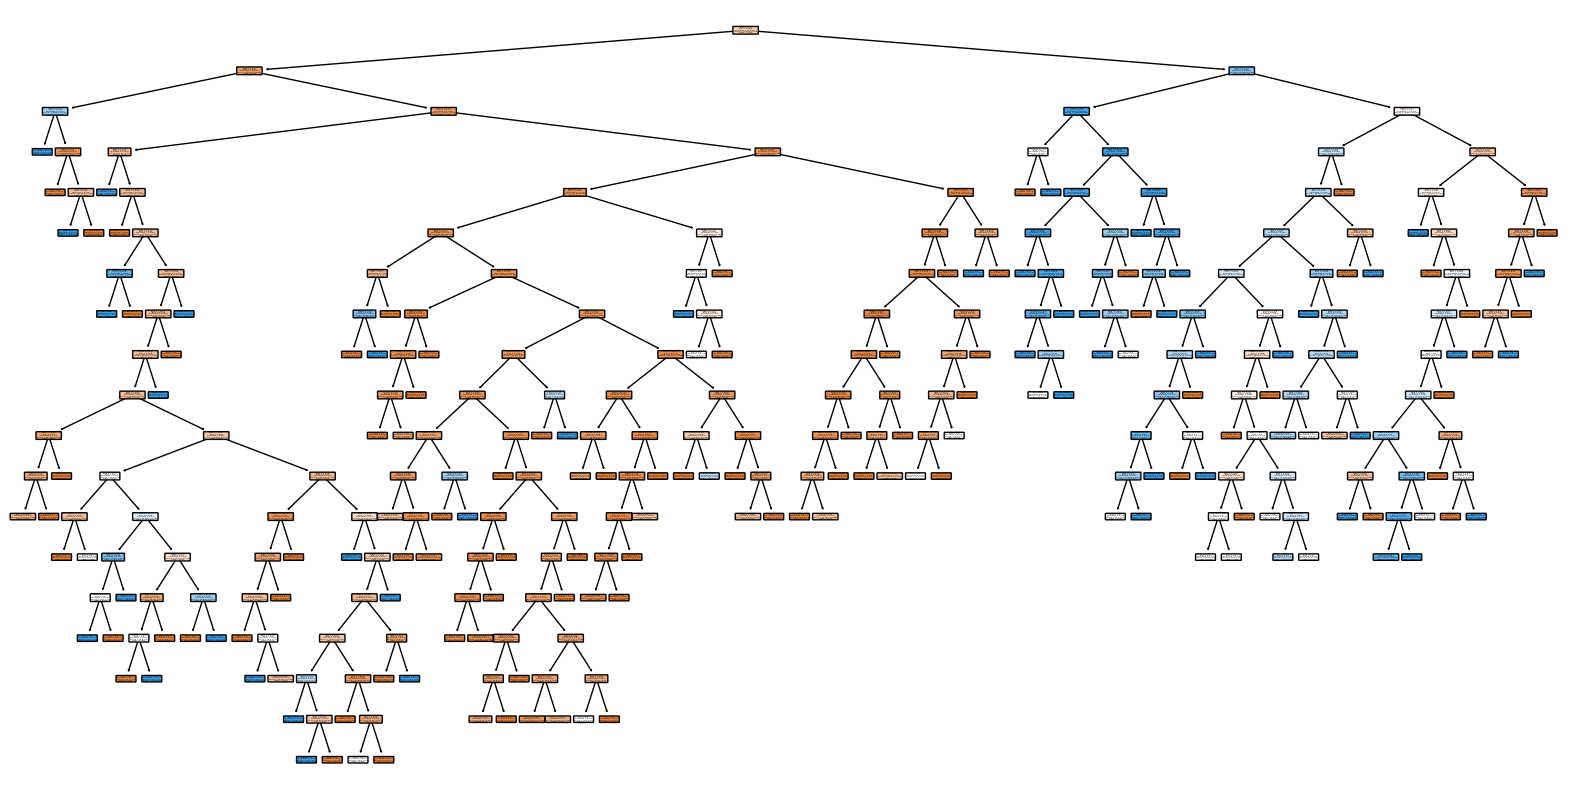

In [150]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=['Died', 'Survived'], rounded=True, proportion=True)
plt.show()

In [151]:
# Prune the tree by limiting its maximum depth
pruned_model = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_model.fit(X_train, y_train)

# Make predictions with the pruned tree
pruned_predictions = pruned_model.predict(X_test)

# Evaluate the performance
pruned_accuracy = accuracy_score(y_test, pruned_predictions)
print(f"Accuracy of pruned tree: {pruned_accuracy:.2f}")

Accuracy of pruned tree: 0.79


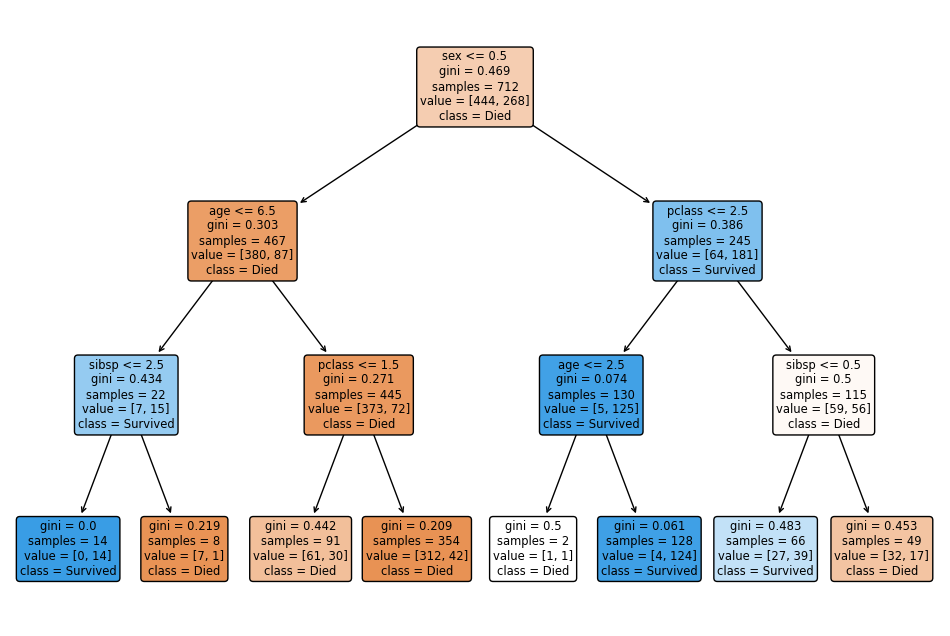

In [153]:
plt.figure(figsize=(12, 8))
plot_tree(pruned_model, filled=True, feature_names=list(X.columns), class_names=['Died', 'Survived'], rounded=True, proportion=False)
plt.show()

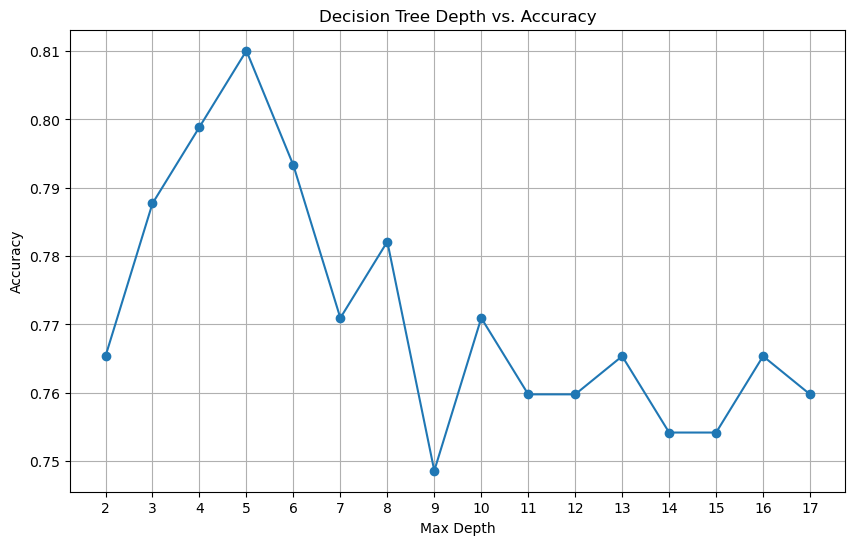

In [156]:
# Range of depths to test
depths = range(2, 18)
accuracies = []

for depth in depths:
    # Initialize the model with the current depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)


# Plotting depth vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.title('Decision Tree Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.76
Precision: 0.73
Recall: 0.66
F1 Score: 0.70


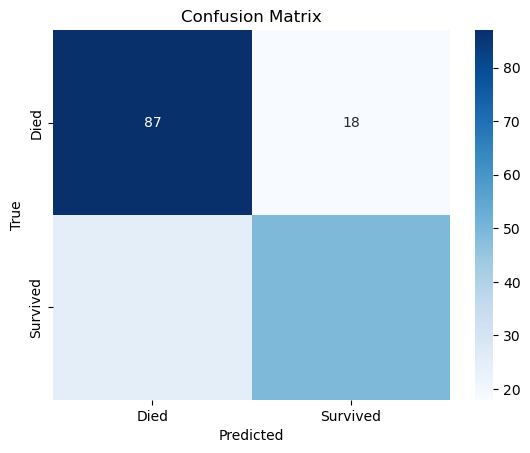

In [159]:
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

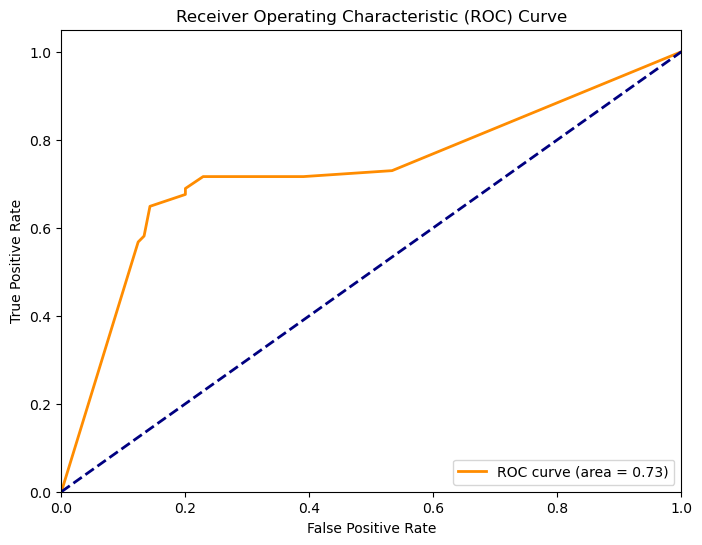

In [162]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [166]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

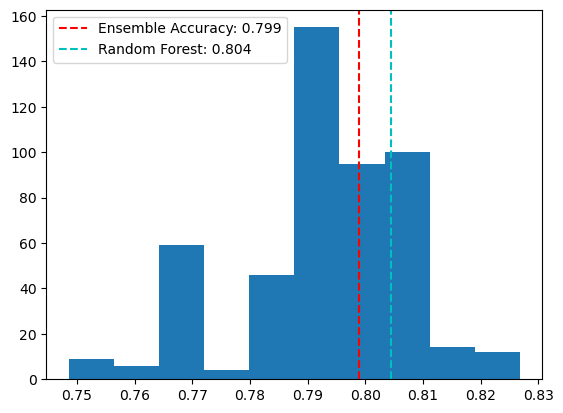

In [188]:
n_estimators = 500  # Number of trees to create
n_samples = X_train.shape[0]
estimators = []  # Store trained trees
predictions_list = []  # Store predictions of each tree
tree_accuracies = []

for _ in range(n_estimators):
    # Create a bootstrap sample
    X_sample, y_sample = resample(X_train, y_train, n_samples=n_samples)
    
    # Train a decision tree on the bootstrap sample
    model = DecisionTreeClassifier(max_depth=3, random_state=42)
    model.fit(X_sample, y_sample)
    estimators.append(model)
    
    # Store predictions for later voting
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    predictions_list.append(predictions)
    tree_accuracies.append(accuracy)

# Aggregate predictions
predictions_list = np.array(predictions_list)
# Majority vote
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions_list)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, majority_vote)


# Initialize a simple decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier with the simple tree
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=500, random_state=42)

# Train the AdaBoost model
ada_boost.fit(X_train, y_train)

# Make predictions
predictions = ada_boost.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, predictions)


plt.hist(tree_accuracies);
plt.axvline(x=ensemble_accuracy, color='r', linestyle='--', label=f'Ensemble Accuracy: {ensemble_accuracy:.3f}')
plt.axvline(x=ada_accuracy, color='c', linestyle='--', label=f'Random Forest: {ada_accuracy:.3f}')
plt.legend()


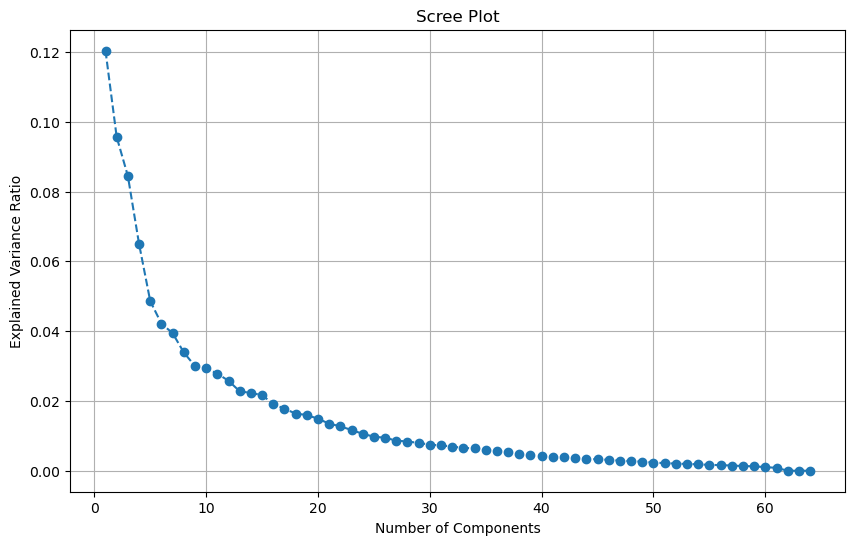

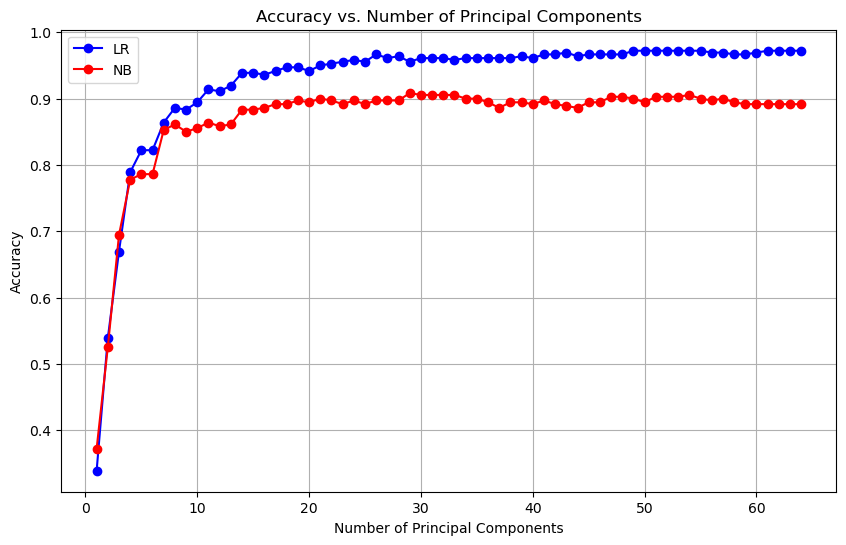

In [197]:
from sklearn.decomposition import PCA

digits = load_digits()
X, y = digits.data, digits.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(0, len(explained_variance),10))
plt.grid(True)
plt.show()

# List to store the number of components and corresponding accuracies
components_list = []
accuracies_lr = []

# Loop over different numbers of principal components
for n_components in range(1, 65):  # Assuming max dimensions is 64 for the digits dataset
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:n_components], y, test_size=0.2, random_state=42)
    
    # Train a Logistic Regression classifier
    classifier = LogisticRegression(max_iter=1000, random_state=42)
    classifier.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the number of components and the accuracy
    components_list.append(n_components)
    accuracies_lr.append(accuracy)

# Plot the accuracies for different numbers of principal components
plt.figure(figsize=(10, 6))
plt.plot(components_list, accuracies_lr, marker='o', linestyle='-', color='b',label='LR')
plt.title('Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)

accuracies_nb = []
# Loop over different numbers of principal components
for n_components in range(1, 65):  # Assuming max dimensions is 64 for the digits dataset
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:n_components], y, test_size=0.2, random_state=42)
    
    # Train a Logistic Regression classifier
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the number of components and the accuracy
    accuracies_nb.append(accuracy)

# Plot the accuracies for different numbers of principal components
plt.plot(components_list, accuracies_nb, marker='o', linestyle='-', color='r',label="NB")
plt.title('Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()